In [303]:
# Importing the required libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm,skew

### Importing the monthly details of the Mandi and the prices 

In [304]:
df_monthly = pd.read_csv('Monthly_data_cmo.csv',parse_dates=['date'])

In [305]:
df_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


In [306]:
df_monthly.shape

(62429, 11)

### The dataset has three numerical features against the commodity and the type of crop.
### Let's see the stats of the dataset to look at mean, std, quartiles and identify possible outliers

In [307]:
df_monthly.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


### The above dataset shows extremely high maximum values as compared to the 75 percentiles values for all the numerical features except Year. However, the dataset has to be treated differently for different commodities. We will have to analyse the mean, std, inter quartile range and major, mild outliers for each commodity individually.

### Let's look at the percentage of missing values held by the data


In [308]:
missing_yearly = (df_monthly.isnull().sum()/len(df_monthly))*100
missing_yearly.sort_values(ascending=False)

state_name         0.0
district_name      0.0
date               0.0
modal_price        0.0
max_price          0.0
min_price          0.0
arrivals_in_qtl    0.0
Month              0.0
Year               0.0
Commodity          0.0
APMC               0.0
dtype: float64

###  The data set appears to have no missing values
### Let's bring out the numerical features and categorical data separately

In [309]:
df_monthly.drop('state_name',axis=1,inplace=True) ### dropping state name as it is Maharashtra for all rows 
numeric_features = (df_monthly.dtypes[df_monthly.dtypes!='object']).index
categric_features = (df_monthly.dtypes[df_monthly.dtypes=='object']).index

### coverting all the strings into lower case so as to perform correct grouping and aggregation in later stages

In [310]:
for i in range(0,len(categric_features)):df_monthly[categric_features[i]]=df_monthly[categric_features[i]].str.lower()
df_monthly.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,ahmednagar,bajri,2015,april,79,1406,1538,1463,2015-04-01,ahmadnagar
1,ahmednagar,bajri,2016,april,106,1788,1925,1875,2016-04-01,ahmadnagar
2,ahmednagar,wheat(husked),2015,april,1253,1572,1890,1731,2015-04-01,ahmadnagar
3,ahmednagar,wheat(husked),2016,april,387,1750,2220,1999,2016-04-01,ahmadnagar
4,ahmednagar,sorgum(jawar),2015,april,3825,1600,2200,1900,2015-04-01,ahmadnagar


### Let's now look at the groupwise statistics and try to bring out the characteristics

In [313]:
def upper_fence(x) :
    qr1 = np.percentile(x,25)
    qr3 = np.percentile(x,75)
    iqr = qr3 - qr1
    return(qr3 + 3.0*iqr)

def lower_fence(x) : 
    qr1 = np.percentile(x,25)
    qr3 = np.percentile(x,75)
    iqr = qr3 - qr1
    return(qr1 - 3.0*iqr)


In [314]:
group_stats = pd.pivot_table(df_monthly.drop(['Year'],axis=1),index='Commodity',aggfunc=['mean','std',upper_fence,lower_fence])
group_stats.head()

C:\Users\vipul\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:45: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(pieces, keys=keys, axis=1)


mean                                         \
            arrivals_in_qtl    max_price    min_price  modal_price   
amba koy         228.333333  3875.000000  2791.666667  3333.333333   
ambat chuka       33.617647  1230.470588   356.000000   451.117647   
amla              47.916667  2117.791667  1079.000000  1616.875000   
apple           9288.000000  9400.836910  5296.171674  7459.866953   
arvi            1517.148148  2420.129630  1947.203704  2181.277778   

                        std                                         \
            arrivals_in_qtl    max_price    min_price  modal_price   
amba koy         182.368674  1718.465886  1612.128510  1664.582030   
ambat chuka       40.647796   426.237467   412.511010   500.528615   
amla              65.094524   582.228252   314.838261   323.711400   
apple          27922.066896  4235.892010  3237.663334  3969.846834   
arvi            2012.683494   718.575925   641.646302   642.443167   

                upper_fence                                     lower_fence  \
            arrivals_in_qtl max_price min_price modal_price arrivals_in_qtl   
amba koy             815.00   9875.00   8375.00     9125.00          -392.5   
ambat chuka          121.00   3120.00   3133.25     3324.25           -71.5   
amla                 219.75   5034.75   2213.25     3012.75          -160.0   
apple              14693.00  26309.00  15188.00    20727.00        -10633.0   
arvi                8181.00   6227.25   5896.25     5873.75         -5920.5   

                                             
            max_price min_price modal_price  
amba koy     -1937.50  -2562.50    -2250.00  
ambat chuka   -660.00  -2284.75    -2377.25  
amla          -782.25   -151.00      183.00  
apple        -8012.00  -5441.00    -6636.00  
arvi         -1360.75  -1928.00    -1364.25

### If there is any commodity for which $\sigma=\infty$, then we can drop these. This is so because we are trying to perform time series analysis and $\sigma=\infty$ means a single data point. A single data point cannot be used for time series analysis. Not using ddof = 0, to make std=0 so as to enable identification of these commodities.

In [315]:
commodities_zero_std = group_stats['std']['modal_price'].index[group_stats['std']['modal_price'].apply(np.isnan)]

In [316]:
len(commodities_zero_std)

11

### there are 11 commodities which have $\sigma = \infty$ which are named below

In [317]:
commodities_zero_std

Index(['baru seed', 'ghee', 'groundnut pods (wet)', 'jui', 'maize (corn.)',
       'other spices', 'papnas', 'shahale', 'skin & bones', 'terda',
       'tuljapuri'],
      dtype='object')

###  Dropping the above mentioned points

In [318]:
# Identifying the commodities with only single data point and listing them from the main dataset
indexes = []
for i in range(0,len(commodities_zero_std)):
    indexes.append((df_monthly[df_monthly['Commodity']==commodities_zero_std[i]].index)[0])
df_monthly.loc[indexes]

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
32067,nanded,baru seed,2016,june,2,4800,4800,4800,2016-06-01,nanded
39158,jintur,ghee,2015,june,20,6100,6925,6500,2015-06-01,parbhani
62000,pune-manjri,groundnut pods (wet),2016,november,9,4167,4500,4267,2016-11-01,pune
45690,pune,jui,2014,september,3,46667,60000,53333,2014-09-01,pune
387,ahmednagar,maize (corn.),2016,august,307,762,1192,977,2016-08-01,ahmadnagar
9872,sillod,other spices,2016,october,1,5800,6000,5900,2016-10-01,aurangabad
5905,amarawati,papnas,2015,december,3,15,20,17,2015-12-01,amaravathi
61582,nashik,shahale,2016,november,2258,1745,2418,2129,2016-11-01,nasik
53401,akluj,skin & bones,2016,may,95,300,700,700,2016-05-01,solapur
45692,pune,terda,2014,september,4,3667,6000,4833,2014-09-01,pune


In [319]:
df_monthly.drop(indexes,inplace=True)

In [320]:
df_monthly.shape

(62418, 10)

### Sorting the data on the basis of the frequency of the commodity. This will help in bringing out the commodities for which large number of sample points are available. The commodities with lower number of sample points may not be useful for time series analysis.

### Regenerating the statistics for each commodity after dropping the commodity with single data points

In [321]:
group_stats = pd.pivot_table(df_monthly.drop(['Year'],axis=1),index='Commodity',aggfunc=['mean','median','std',upper_fence,lower_fence])
group_stats.head()
mean_stage_2 = group_stats['mean']
std_stage_2 = group_stats['std']

In [322]:
commodity_index = np.array(group_stats.index)

In [323]:
commodity_data = []
for i in range(0,len(commodity_index)):
    no_samples = len(df_monthly[df_monthly['Commodity']==commodity_index[i]])
    commodity_data.append(no_samples)

In [324]:
commodity_data=pd.DataFrame(index=commodity_index,data={'no of samples':commodity_data})

### Let's have a look at the commodities with highest number of recorded observations and their counts. Later, I have extracted commodities which have $n_{sample}>1000$

In [325]:
commodity_data.sort_values(by='no of samples',ascending=False,inplace=True)
features = np.array(commodity_data[commodity_data['no of samples']>1000].index)
commodity_data.head()

,no of samples
gram,4115
wheat(husked),4097
soybean,3727
sorgum(jawar),3716
pigeon pea (tur),3477


<Figure size 432x288 with 0 Axes>

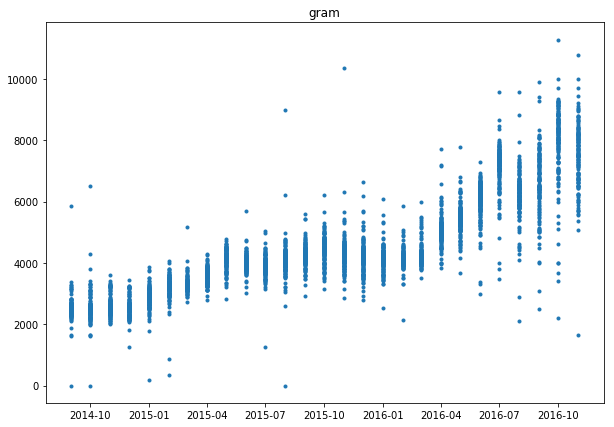

<Figure size 432x288 with 0 Axes>

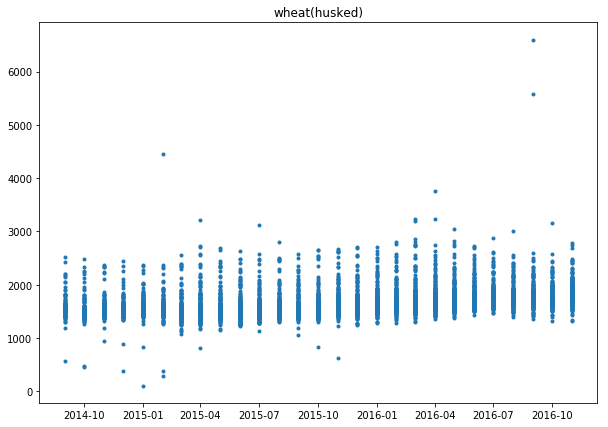

<Figure size 432x288 with 0 Axes>

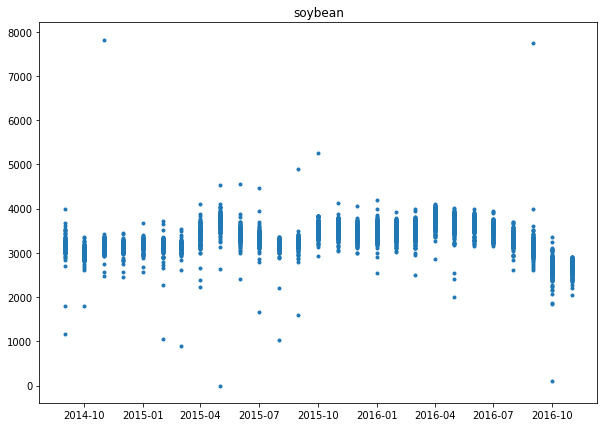

<Figure size 432x288 with 0 Axes>

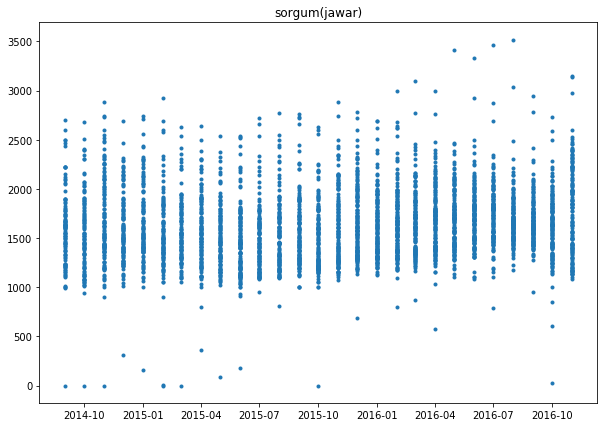

<Figure size 432x288 with 0 Axes>

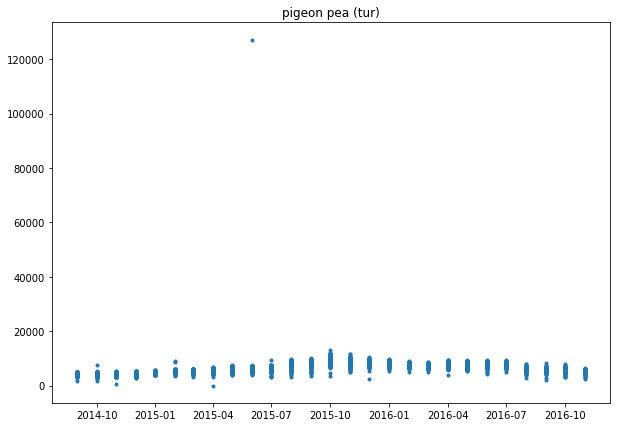

<Figure size 432x288 with 0 Axes>

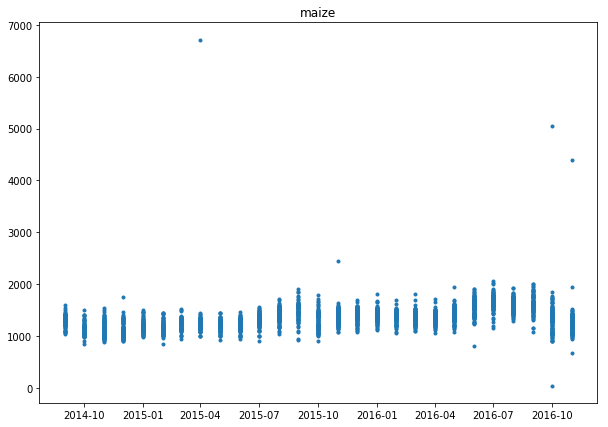

<Figure size 432x288 with 0 Axes>

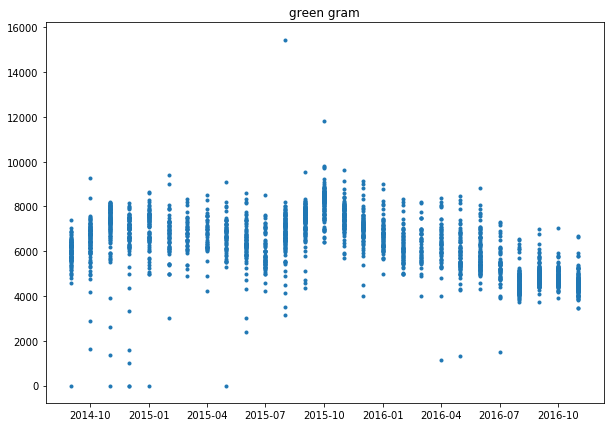

<Figure size 432x288 with 0 Axes>

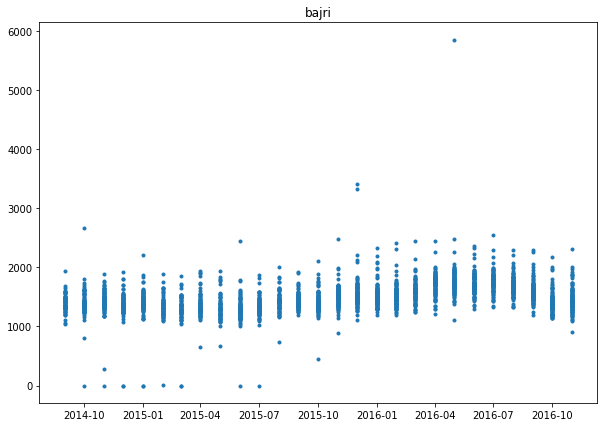

<Figure size 432x288 with 0 Axes>

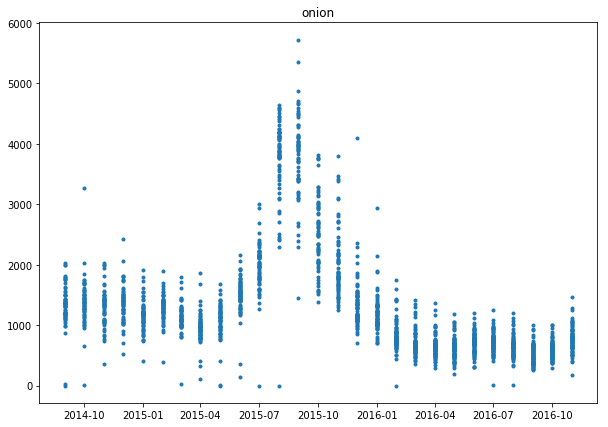

<Figure size 432x288 with 0 Axes>

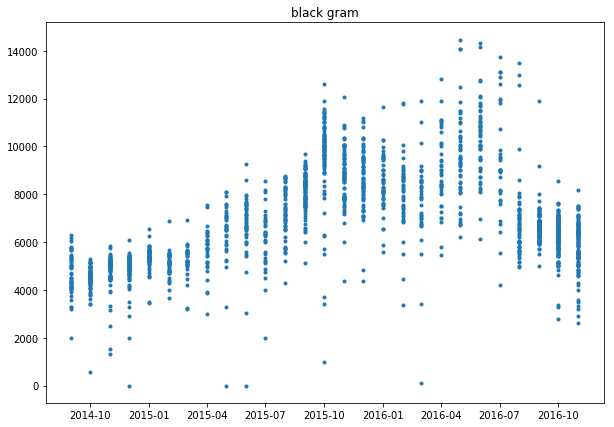

<Figure size 432x288 with 0 Axes>

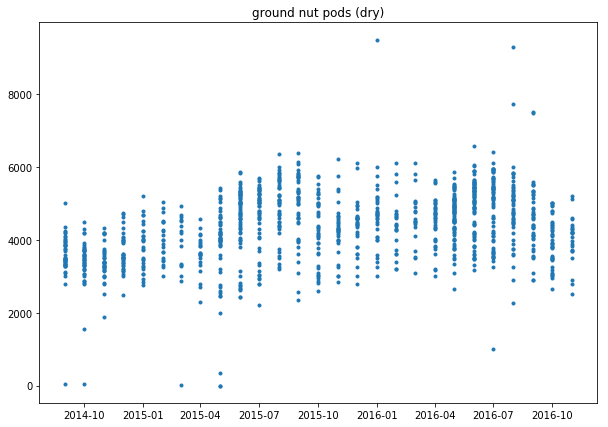

<Figure size 432x288 with 0 Axes>

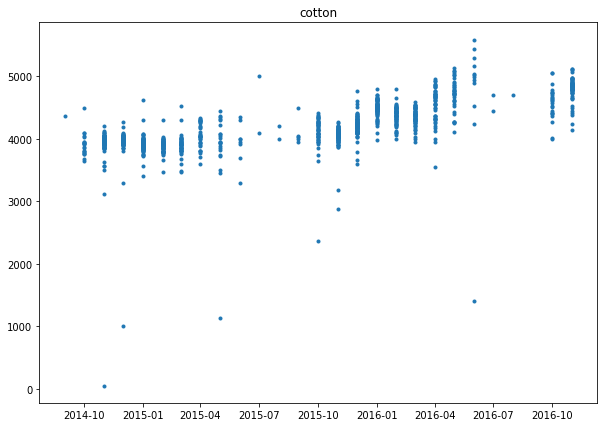

<Figure size 432x288 with 0 Axes>

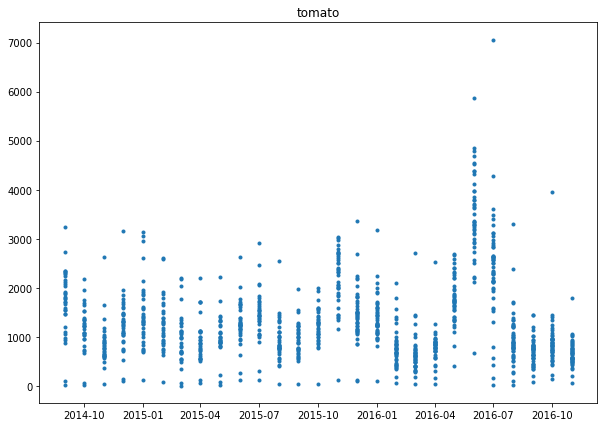

<Figure size 432x288 with 0 Axes>

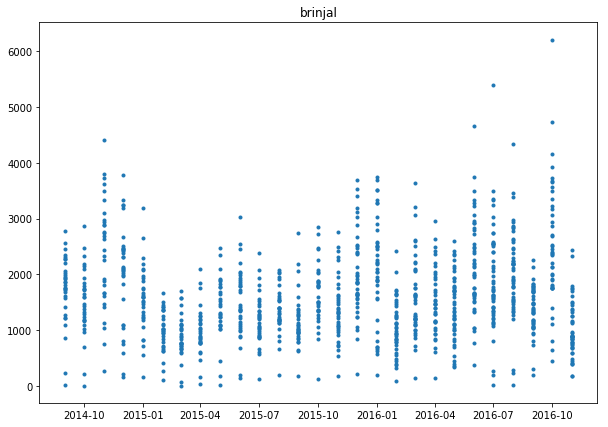

In [326]:
for i in range(0,len(features)):
    plt.figure(i)
    plt.figure(figsize=(10,7))
    data = df_monthly[df_monthly['Commodity']==features[i]]
    ax=plt.plot(data['date'],data['modal_price'],'.')
    plt.title(features[i])
    plt.show()

### Previously upper and lower fences were found. In the following steps, the outliers are identified and then replaced with uppper and lower fence value. Earlier (previous edition of the code), Median value was chosen as it is more robust to outliers. However, I am not satisfied with the median value as it failed to capture the commodity price hike during late showers in Maharashtra (2015); which increased the prices of onion by almost 100%. 

In [328]:
feats = ['arrivals_in_qtl','max_price','min_price','modal_price']
for j in range(0,len(feats)):
    feature = feats[j]
    for i in range(0,len(commodity_index)):
        name = commodity_index[i]
        ub   = group_stats['upper_fence'][feature][name]
        lb   = group_stats['lower_fence'][feature][name]
        series = df_monthly[df_monthly['Commodity']==name][feature]
        mean_ = group_stats['mean'][feature][name]
        upper_= group_stats['upper_fence'][feature][name]
        lower_= group_stats['lower_fence'][feature][name]
        outlier_h = series[series>ub]
        outlier_l = series[series<lb]
        df_monthly[feature].loc[outlier_h.index]=upper_
        df_monthly[feature].loc[outlier_l.index]=lower_

C:\Users\vipul\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### In the preceding steps, the outliers were replaced with the extreme acceptable values. Let's see the effect on the distribution again!

<Figure size 432x288 with 0 Axes>

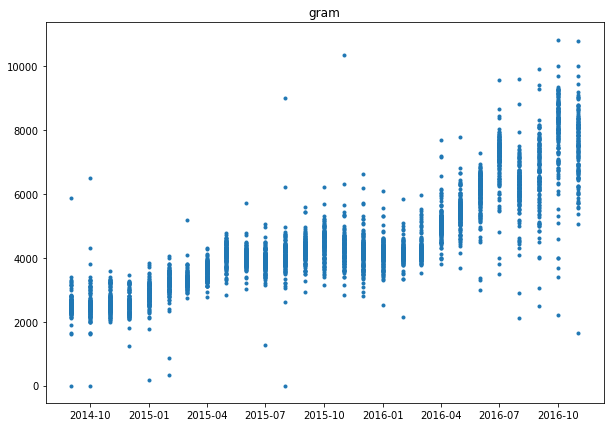

<Figure size 432x288 with 0 Axes>

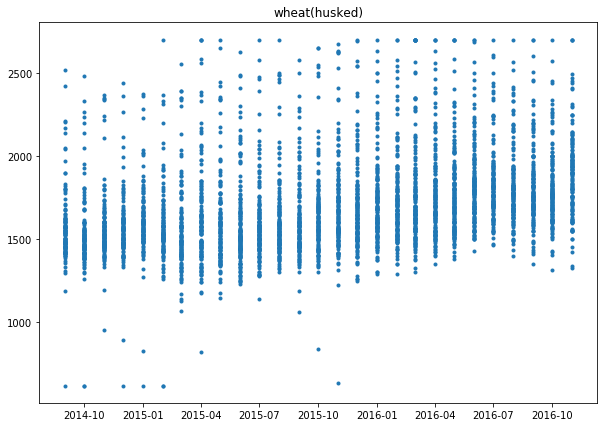

<Figure size 432x288 with 0 Axes>

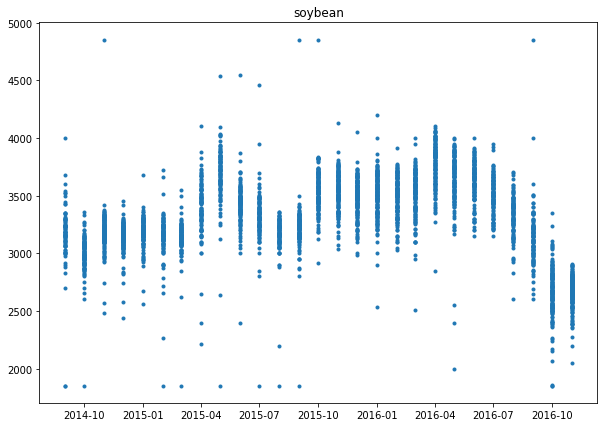

<Figure size 432x288 with 0 Axes>

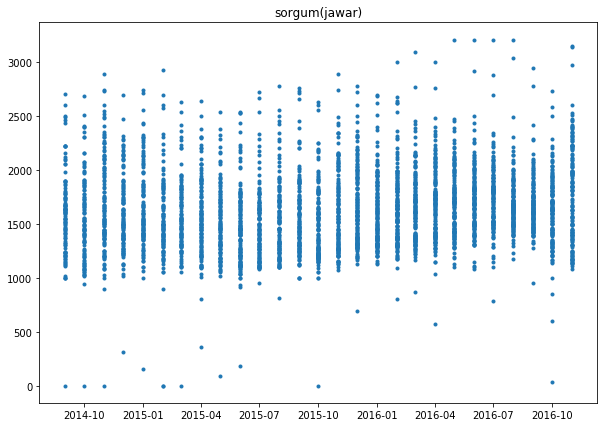

<Figure size 432x288 with 0 Axes>

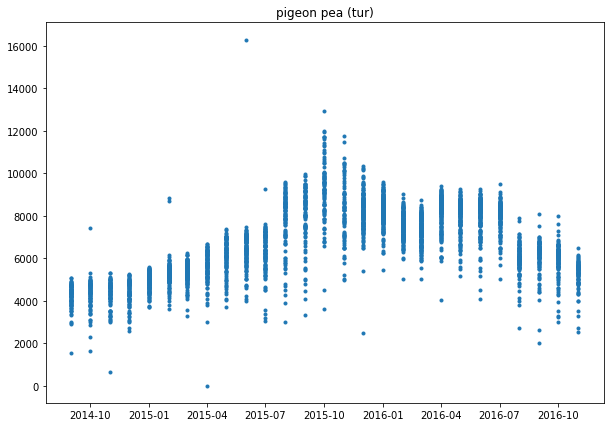

<Figure size 432x288 with 0 Axes>

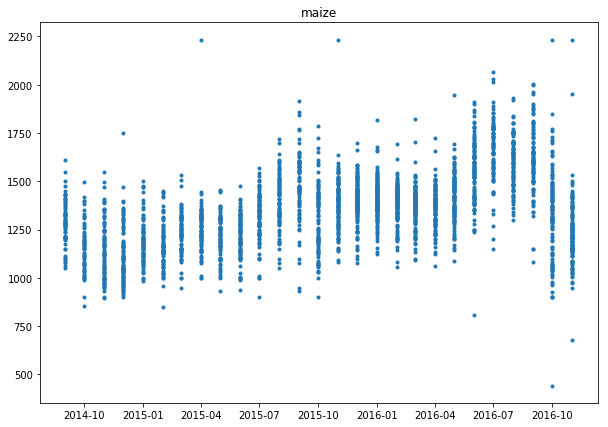

<Figure size 432x288 with 0 Axes>

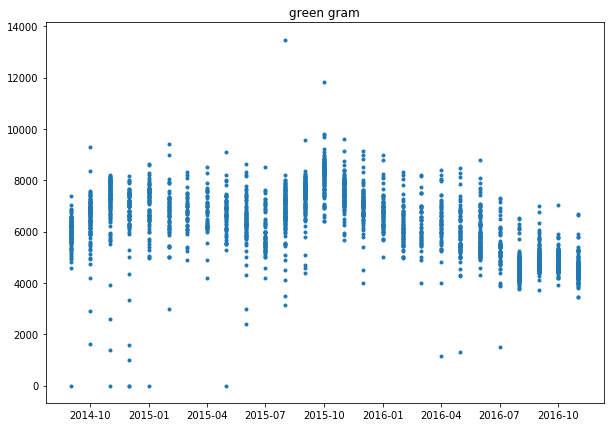

<Figure size 432x288 with 0 Axes>

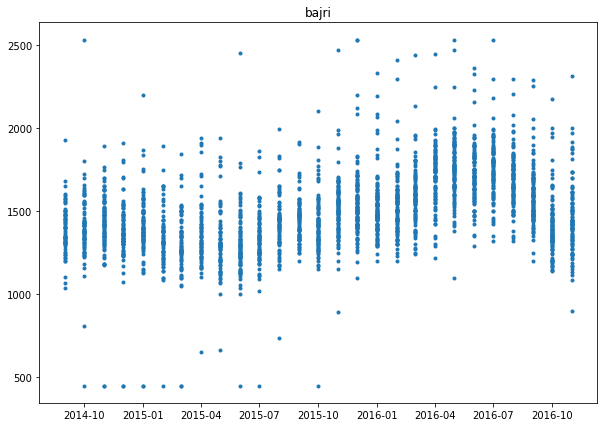

<Figure size 432x288 with 0 Axes>

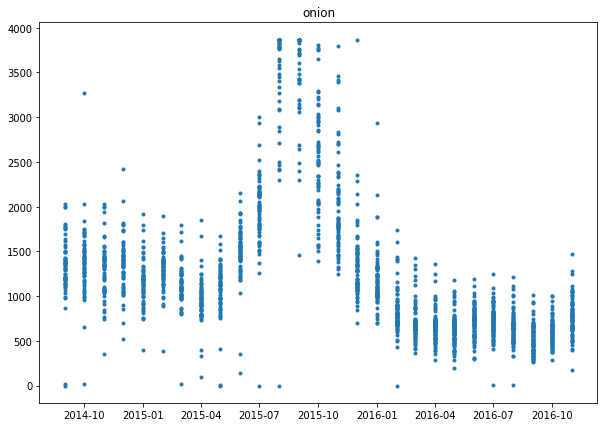

<Figure size 432x288 with 0 Axes>

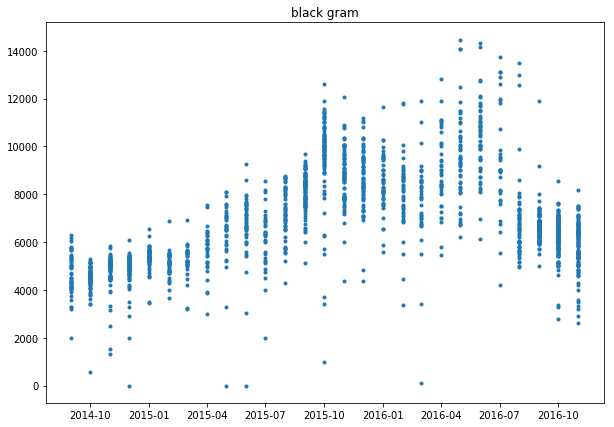

<Figure size 432x288 with 0 Axes>

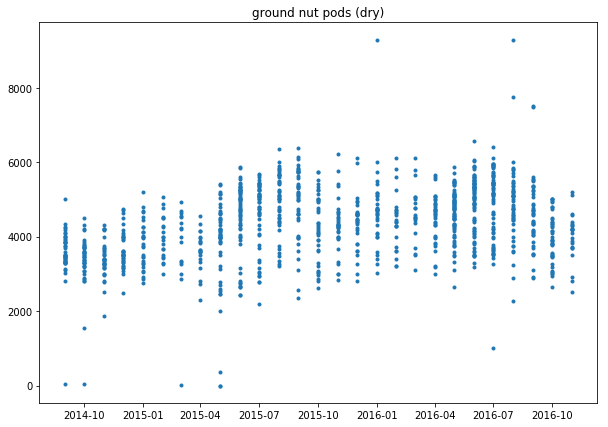

<Figure size 432x288 with 0 Axes>

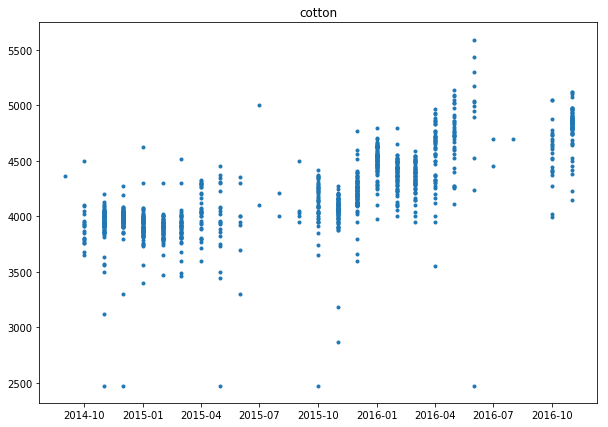

<Figure size 432x288 with 0 Axes>

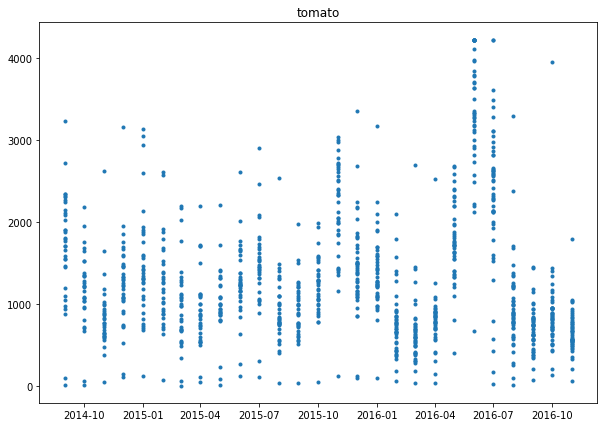

<Figure size 432x288 with 0 Axes>

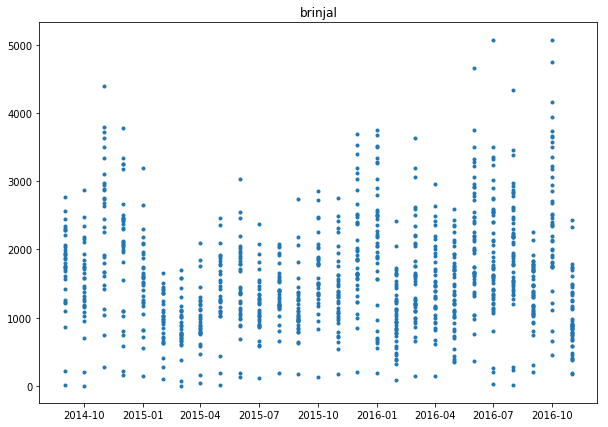

In [331]:
for i in range(0,len(features)):
    plt.figure(i)
    plt.figure(figsize=(10,7))
    data = df_monthly[df_monthly['Commodity']==features[i]]
    ax=plt.plot(data['date'],data['modal_price'],'.')
    plt.title(features[i])
    plt.show()

### At present, it looks like the substitution of the outliers with upper and lower fence values is working. The data captures the inflation and deflation while being away from the outliers.